In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def step(x):
    return np.where(x>=0,1,0)

def d_step(x):
    return np.zeros(x.shape)

def step_sign(x):
    return np.where(x>=0,1,-1)

def d_step_sign(x):
    return np.zeros(x.shape)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1/np.cosh(x)**2

def relu(x):
    return np.maximum(0,x)

def d_relu(x):
    return np.where(x>=0,1,0)

def leaky_relu(x,alpha = 0.01):
    return np.where(x>=0,x,x*alpha)
    
def d_leaky_relu(x,alpha = 0.01):
    return np.where(x>=0,1,alpha)

def softmax(x):
    exp_x = np.exp(x-np.max(x))
    return exp_x/np.sum(exp_x)

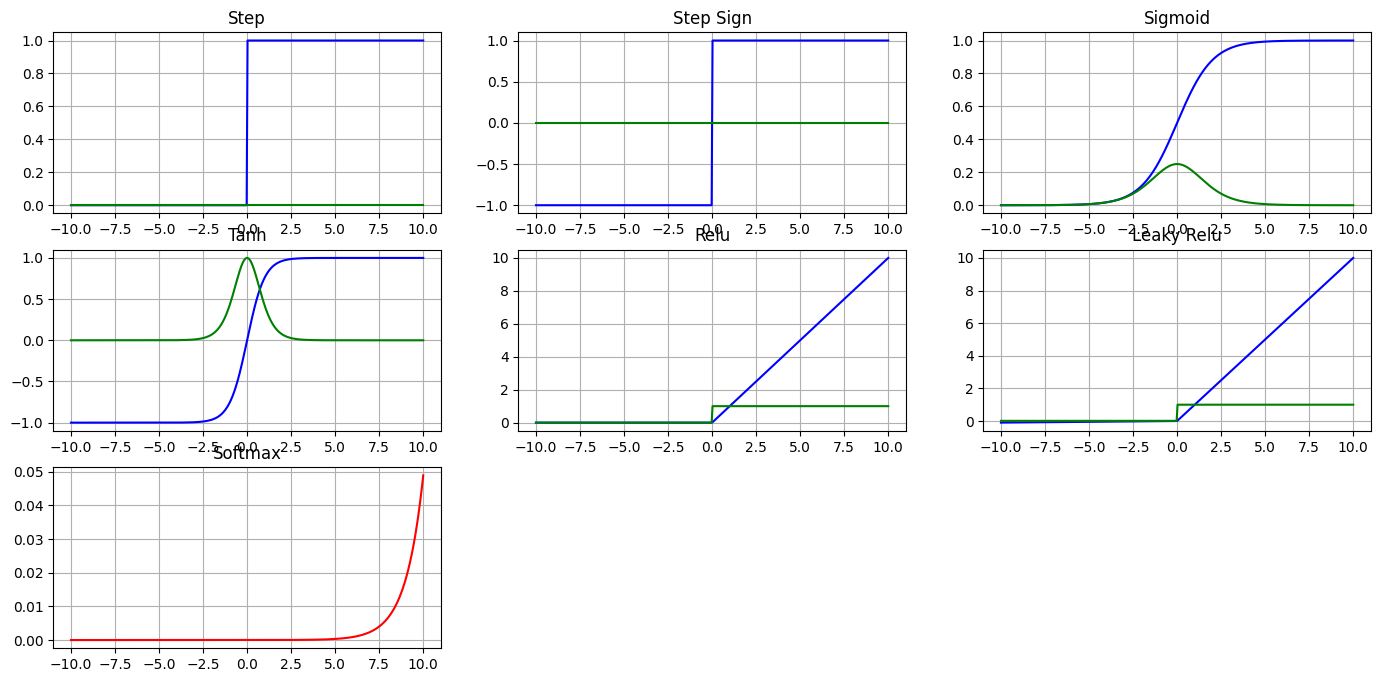

In [27]:
x = np.linspace(-10,10,400)
plt.figure(figsize = (17,8))
plt.subplot(3,3,1)
plt.plot(x,step(x),color = 'blue')
plt.plot(x,d_step(x),color = 'green')
plt.title("Step")
plt.grid(True)
plt.subplot(3,3,2)
plt.plot(x,step_sign(x),color = 'blue')
plt.plot(x,d_step_sign(x),color = 'green')
plt.title("Step Sign")
plt.grid(True)
plt.subplot(3,3,3)
plt.plot(x,sigmoid(x),color = 'blue')
plt.plot(x,d_sigmoid(x),color = 'green')
plt.title("Sigmoid")
plt.grid(True)
plt.subplot(3,3,4)
plt.plot(x,tanh(x),color = 'blue')
plt.plot(x,d_tanh(x),color = 'green')
plt.title("Tanh")
plt.grid(True)
plt.subplot(3,3,5)
plt.plot(x,relu(x),color = 'blue')
plt.plot(x,d_relu(x),color = 'green')
plt.title("Relu")
plt.grid(True)
plt.subplot(3,3,6)
plt.plot(x,leaky_relu(x),color = 'blue')
plt.plot(x,d_leaky_relu(x),color = 'green')
plt.title("Leaky Relu")
plt.grid(True)
plt.subplot(3,3,7)
plt.plot(x,softmax(x),color = 'red')
plt.title("Softmax")
plt.grid(True)

In [31]:
# perceptron with single input
def activation(x):
    return 1 if x>=0 else 0

def f(x,w,b):
    return w*x+b

def predict_1d(X,w,b):
    return[activation(f(x,w,b)) for x in X]

def train_perceptron_1d(X,y,learning_rate = 0.01, epochs = 10):
    w = 0.0
    b = 0.0

    for _ in range(epochs):
        for i in range(len(X)):
            z = f(X[i],w,b)

            prediction = activation(z)
            error = y[i] - prediction

            w += learning_rate * error * X[i]
            b += learning_rate * error

    return w, b

X = np.array([1,2,3,4,5])
y = np.array([0,0,0,1,1])

w, b = train_perceptron_1d(X,y)
print("Learned weight : " , w)
print("Learned bias : " , b)

X_test = np.array([2.5,3.5])
print("Predictions : " ,predict_1d(X_test,w,b))

Learned weight :  0.009999999999999992
Learned bias :  -0.03
Predictions :  [0, 1]


In [57]:
# perceptron with two input

def f(x,w,b):
    return np.dot(x,w)+b

def predict_2d(X,w,b):
    return[step(f(x,w,b)) for x in X]

def train_perceptron_2d_step(X,y,learning_rate = 0.01, epochs = 10):
    n_samples , n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    errors = []
    for _ in range(epochs):
        total_error = 0
        for i in range(n_samples):
            z = f(X[i],w,b)

            prediction = step(z)
            error = y[i] - prediction
            total_error += abs(error)

            w += learning_rate * error * X[i]
            b += learning_rate * error

        errors.append(total_error)

    return w, b, errors
def train_perceptron_2d_sign(X,y,learning_rate = 0.01, epochs = 10):
    n_samples , n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    errors = []
    for _ in range(epochs):
        total_error = 0
        for i in range(n_samples):
            z = f(X[i],w,b)

            prediction = step_sign(z)
            error = y[i] - prediction
            total_error += abs(error)

            w += learning_rate * error * X[i]
            b += learning_rate * error

        errors.append(total_error)

    return w, b, errors

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1],
    [2,2]
])
y = np.array([0,0,0,1,1])

w1, b1 , errors1= train_perceptron_2d_step(X,y)
w2, b2 , errors2= train_perceptron_2d_sign(X,y)
print("Learned weight : " , w1)
print("Learned bias : " , b1)
print("Learned weight : " , w2)
print("Learned bias : " , b2)

X_test = np.array([
    [1,2],
    [0.5,0.5]
])
print("Predictions : " ,predict_2d(X_test,w1,b1))
print("Predictions : " ,predict_2d(X_test,w2,b2))

Learned weight :  [0.02 0.01]
Learned bias :  -0.03
Learned weight :  [0.02 0.02]
Learned bias :  -0.019999999999999997
Predictions :  [array(1), array(0)]
Predictions :  [array(1), array(0)]


Text(0.5, 1.0, 'Epoch vs Error')

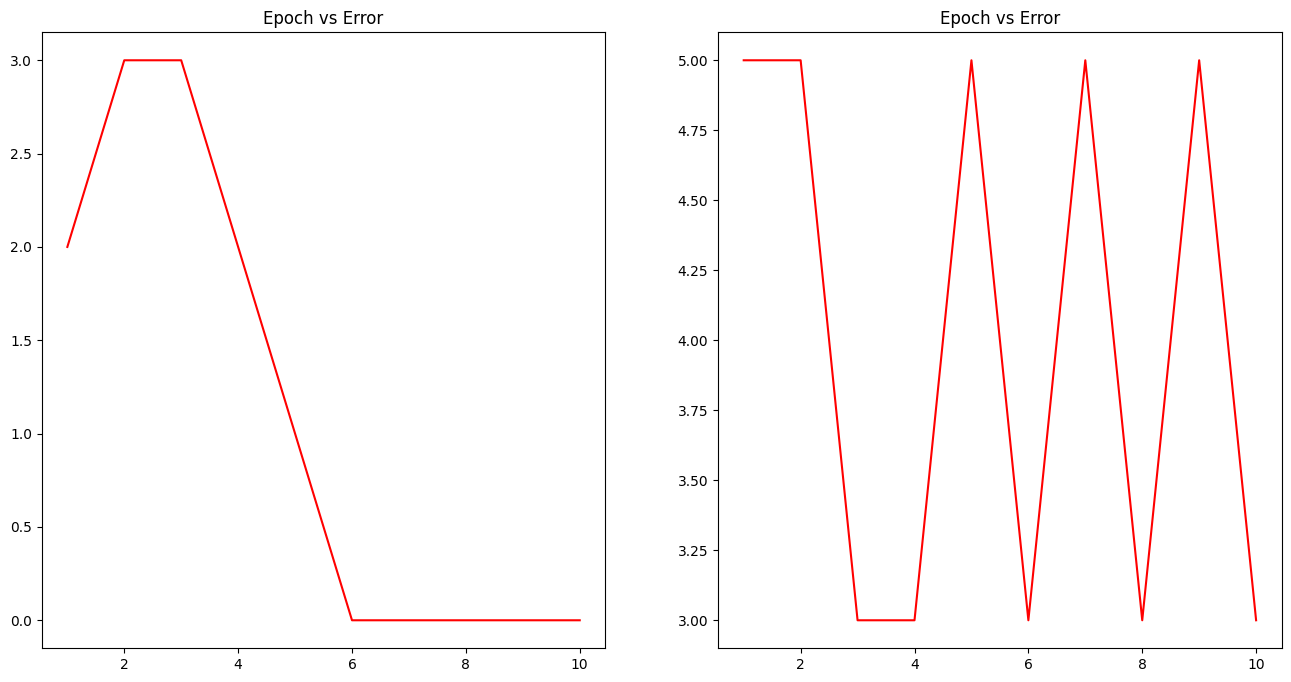

In [61]:
x = np.arange(1,11)
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.plot(x,errors1,color = 'red')
plt.title("Epoch vs Error")
plt.subplot(1,2,2)
plt.plot(x,errors2,color = 'red')
plt.title("Epoch vs Error")